**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [82]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [83]:
%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X*1.
        self.y_train = np.array(y, dtype=int)
        self.precalculate_A = (self.X_train**2).sum(axis=1)
        return self

    def __distance(self, X):
        B = ((X*1.)**2).sum(axis=1).reshape(-1, 1)
        SUM = self.precalculate_A + B
        return SUM - 2*(X*1.).dot(self.X_train.T)

    def predict(self, X):
        out = np.zeros(X.shape[0])
        maxK = 1 + int(X.shape[0]/100)
        count = 0
        for k in range(1, maxK+1):
            start_range = int((k-1)*X.shape[0]/maxK)
            end_range = int(k*X.shape[0]/maxK)
            argsX = np.argpartition(
                self.__distance(X[start_range:end_range]),
                self.n_neighbors, axis=1
            )[:, :self.n_neighbors]
            for i in range(argsX.shape[0]):
                y = self.y_train[argsX[i]]
                unics, counts = np.unique(y, return_counts=True)
                out[count] = unics[np.argmax(counts)]
                count += 1
        return out

    def predict_proba(self, X):
        out = np.zeros((X.shape[0], np.unique(self.y_train).shape[0]))
        maxK = 1 + int(X.shape[0]/100)
        count = 0
        for k in range(1, maxK+1):
            start_range = int((k-1)*X.shape[0]/maxK)
            end_range = int(k*X.shape[0]/maxK)
            argsX = np.argpartition(
                self.__distance(X[start_range: end_range]),
                self.n_neighbors, axis=1
            )[:, :self.n_neighbors]
            for i in range(argsX.shape[0]):
                y = self.y_train[argsX[i]]
                unics, counts = np.unique(y, return_counts=True)
                out[count][unics] = counts/np.sum(counts)
                count += 1
        return out

    def score(self, X, y):
        return np.sum(self.predict(X*1.) == y, dtype=np.float32)/len(y)


**IRIS**

In [84]:
iris = datasets.load_iris()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [86]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [87]:
%time clf.fit(X_train, y_train)

Wall time: 499 µs


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [88]:
%time my_clf.fit(X_train, y_train)

Wall time: 512 µs


MyKNeighborsClassifier(n_neighbors=2)

In [89]:
%time clf.predict(X_test)

Wall time: 986 µs


array([2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 0, 1, 0])

In [90]:
%time my_clf.predict(X_test)

Wall time: 1 ms


array([2., 0., 1., 1., 0., 2., 0., 2., 1., 2., 1., 2., 0., 1., 0.])

In [91]:
%time clf.predict_proba(X_test)

Wall time: 1 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [77]:
%time my_clf.predict_proba(X_test)

Wall time: 984 µs


array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

In [92]:
clf.score(X_test, y_test)

1.0

In [93]:
my_clf.score(X_test, y_test)

1.0

In [80]:
# Задание 3

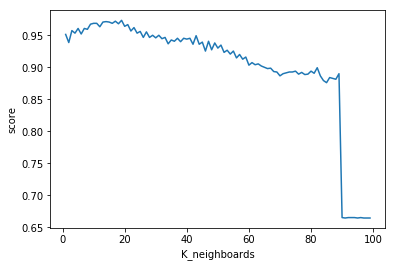

In [96]:
K_neighboards_max = 100
number_of_experiments = 100
y = np.zeros(K_neighboards_max)
for e in range(number_of_experiments):
    iris = datasets.load_iris()
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
    for k in range(1,K_neighboards_max):
        y[k]+=MyKNeighborsClassifier(k).fit(X_train, y_train).score(X_test, y_test)
y = y/number_of_experiments
plt.plot(range(K_neighboards_max)[1:], y[1:])
plt.ylabel('score')
plt.xlabel('K_neighboards')
plt.show()

In [52]:
print("Максимум при k = %d, в среднем равный %.2f score" % (np.argmax(y), y.max()))

Максимум при k = 11, в среднем равный 0.97 score


**MNIST**

In [60]:
mnist = fetch_mldata('MNIST original')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [62]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [63]:
%time clf.fit(X_train, y_train)

Wall time: 36.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [64]:
%time my_clf.fit(X_train, y_train)

Wall time: 430 ms


MyKNeighborsClassifier(n_neighbors=2)

In [33]:
%time clf.predict(X_test)

Wall time: 9min 28s


array([4., 7., 6., ..., 1., 5., 0.])

In [65]:
%time my_clf.predict(X_test)

Wall time: 20.1 s


array([6., 1., 1., ..., 1., 9., 2.])

In [35]:
%time clf.predict_proba(X_test)

Wall time: 9min 29s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [66]:
%time my_clf.predict_proba(X_test)

Wall time: 19.3 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [37]:
clf.score(X_test, y_test)

0.9647142857142857

In [38]:
my_clf.score(X_test, y_test)

0.9647142857142857

Задание 5

# seaborn
Обёртка matplotlib привносящая в неё улучшения в плане визуализации и простоты

# matplotlib
Библиотека для построения графиков

# train_test_split
 функция для случайного разбиения всей обучающей выборки на две части
 
# Pipelin%load_exte (from sklearn.pipeline import Pipeline)
Позволяет совершать последовательность преобразований над данными.

# StandardScaler (from sklearn.preprocessing import StandardScaler)
Масштабирование объектов путем удаления среднего значения и масштабирования до единичной дисперсии

# ClassifierMixin
Базовый класс для всех классификаторов. Содержит метод score, который определяет среднюю точность предсказанных данных

# NeighborsBase
Общий интерфейс для алгоритмов поиска соседей

# KNeighborsMixin
Класс предоставляющий реализацию методов kneighbors и kneighbors_graph 

# SupervisedIntegerMixin
Предоставляет реализацию fit на данных с типом int
